# Section 1: business understanding   
   
   ## 1- how to get more costumers ?
   ## 2- what is the reasonable price for an apartment in seattle?
   ## 3- how to get great comments? 
 

In [13]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lion-\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Gather

In [33]:
# all of them are from the same link of airbnb seattle 2016 
df = pd.read_csv('calendar.csv')
li = pd.read_csv('listings.csv')
rev = pd.read_csv('reviews.csv')

 # Sction 2: data understanding 
 ### Assess

In [112]:
# checking the listings data file
li.head()
list(li.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


 ### Assess

In [255]:
# decided that i will compare the ratings and price from this data to answer first question
li[['review_scores_rating', 'price']]

,review_scores_rating,price
0,95.0,$85.00
1,96.0,$150.00
2,97.0,$975.00
3,NaN,$100.00
4,92.0,$450.00
...,...,...
3813,80.0,$359.00
3814,100.0,$79.00
3815,NaN,$93.00
3816,NaN,$99.00


In [243]:
# here i will check another dataset (calender)
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


 ### Assess

In [247]:
# i want to compare the prices 
df.price.value_counts(normalize=True)

$150.00    0.039213
$100.00    0.033979
$75.00     0.031909
$125.00    0.029467
$65.00     0.028265
             ...   
$745.00    0.000001
$524.00    0.000001
$662.00    0.000001
$654.00    0.000001
$759.00    0.000001
Name: price, Length: 669, dtype: float64

In [248]:
# here checking another dataset (reviews)
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [252]:
rev[['listing_id','comments']]

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...
...,...,...
84844,3624990,The description and pictures of the apartment ...
84845,3624990,We had an excellent stay. It was clean and com...
84846,3624990,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,"Very good apartement, clean and well sized. Si..."


 ### Assess

In [254]:
rev.listing_id.value_counts()

208356     474
365550     466
25002      404
47196      353
63308      320
          ... 
5992645      1
9465815      1
2875975      1
7873208      1
6808970      1
Name: listing_id, Length: 3191, dtype: int64

# Sction 3: prepare data
### Clean

In [34]:
# only rating and price are needed
li2=li[['review_scores_rating', 'price']]

# take out rows of null values to get more details (listings dataset)
li2 = li2.dropna()

# taking out the dollar sign for more acuracy 
li2 =li2.astype(str)
li2['price']= li2['price'].str.replace(r"$", "", regex=True)

# drop row if there is null value (calender dataset)
nonulls = df.dropna()
# remove dollar($) sign and comma(,) for accuracy   
price = nonulls.price.str.replace(',','').str.replace('$','')

###  ^^ droped the vlues that are missing to decrease the amount of bias in the data 

### function to get comments on specific apatrment

In [52]:
def get_comment(df, listingID):
    """ 
    INPUT:
    df - the pandas dataframe you want to look in for a comments
    listingID - enter the number of listing id you want to look for its comments
    
    OUTPUT:
    new_df - rows of each comment of that apatrment you entered its listing_id
    """
    
    new_df = df[df.listing_id==listingID].comments
    return new_df

In [54]:
get_comment(rev,3624990)

84830    The location is super convenient to the state ...
84831    This apartment is in a great location - easy w...
84832    Absolutely perfect stay! Doug & Rebecca were s...
84833    Excellent room, very attentive property manage...
84834    Great, clean place in a perfect location for a...
84835    What an amazing place to stay in Seattle! A fe...
84836    We had an excellent stay at Seattle Suites! Th...
84837    The apartment was clean and accurate to the de...
84838    We were warmly greeted by Doug at the time agr...
84839    The apartment was clean, tidy and as described...
84840    We were with 7 people in rebecca's two 2-bed a...
84841    Great place in the middle of the city. Easy to...
84842    We loved how close it was to the Convention Ce...
84843    Comfortability upon arrival and everything wit...
84844    The description and pictures of the apartment ...
84845    We had an excellent stay. It was clean and com...
84846    Gran ubicación, cerca de todo lo atractivo del.

# Section 4: modling ( not used )
<><><><><><><><><><><><><><><><><><><><><><><><><><><>

# Section 5: Evaluation
 

##       Question 1: how to get more costumers ?
### Analyze

In [261]:
# we can see that 150$ and lower is the most common price  
li2.price.value_counts(normalize=True)

150.00    0.040997
100.00    0.035320
75.00     0.031220
95.00     0.029959
85.00     0.028382
            ...   
290.00    0.000315
102.00    0.000315
557.00    0.000315
365.00    0.000315
198.00    0.000315
Name: price, Length: 260, dtype: float64

### Analyze

<AxesSubplot:>

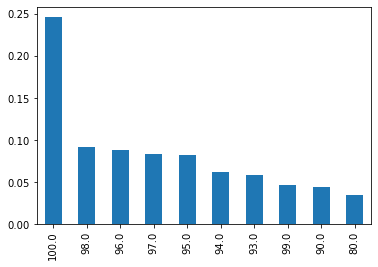

In [50]:
# we can see that around 76% are rated 90 and above

l2=li2.review_scores_rating.value_counts(normalize=True)
l2.iloc[:10].plot.bar()


### visualize

<AxesSubplot:>

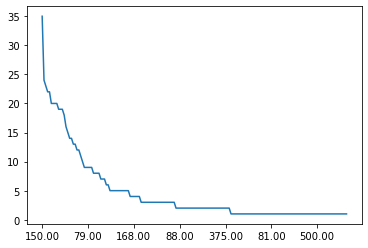

In [285]:
#we can see that most of the 100 ratings cost 150$ and lower
li2[li2.review_scores_rating=='100.0'].price.value_counts().plot()


### we can see that 150 is the most common price, also around 76% of the apartments are rated 90 and above,  most of the 100/100 ratings cost 150$ and lower, so price has a good impact on ratings the other questions will help you to get more costumers too.

## Question 2: what is the reasonable price for an apartment in seattle? 
### Analyze

In [265]:
# we can see that highest price is $999.00
price.max()

'999.00'

In [266]:
## we can see that lowest price is $10.00
price.min()

'10.00'

### Visualize

<AxesSubplot:ylabel='Frequency'>

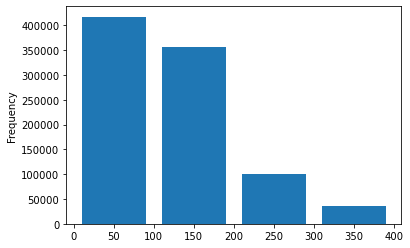

In [267]:
# df[df.available=='f'].date.value_counts(normalize=True)
price=price.astype(float)
price.plot(kind='hist',bins=[0,100,200,300,400],rwidth=0.8)

### so we can say rent cost ranges from 10 to 999 , this chart shows that most of them cost between 20 to 80 a day 


## Question 3:  how to get great comments?

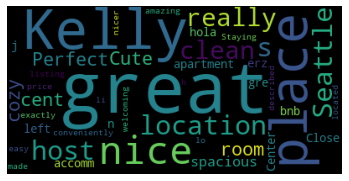

In [26]:
# good location and great host and clean is the most comments
# rev[rev.listing_id==7202016].comments    
rev['comments'] = rev['comments'].astype(str)
tokenized_comments=rev[rev.listing_id==7202016].comments.apply(word_tokenize)
text=WordCloud().generate(tokenized_comments.to_string())
plt.imshow(text)
plt.axis("off")
plt.show()
# sw_list = ['likes','']
# all_stopwords.extend(sw_list)
# text_tokens = rev[rev.listing_id==7202016].comments.apply(word_tokenize)
# tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

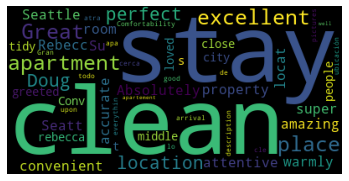

In [27]:

tokenized_comments=rev[rev.listing_id==3624990].comments.apply(word_tokenize)
text=WordCloud().generate(tokenized_comments.to_string())
plt.imshow(text)
plt.axis("off")
plt.show()

###  good location and great host and clean is the most mentioned comments  so foucusing in those surely well have a good impact 